In [21]:
%reload_ext autoreload
%autoreload 2

from preprocessing_merge import *
from preprocessing_train_test import *
from clustering import *

pd.set_option('display.max_columns', 100)  # 设置显示100列
pd.set_option('display.max_rows', 100)   # 设置显示100行

# Data Import

In [22]:
%%time
# Import data
train_df_raw = pd.read_csv(os.path.join(DATA_DIRECTORY, "train.csv"))
test_df_raw = pd.read_csv(os.path.join(DATA_DIRECTORY, "test.csv"))

commerical_df = pd.read_csv(os.path.join(DATA_DIRECTORY, "auxiliary-data/sg-commerical-centres.csv"))
market_df = pd.read_csv(os.path.join(DATA_DIRECTORY, "auxiliary-data/sg-gov-markets-hawker-centres.csv"))

population_df = pd.read_csv(os.path.join(DATA_DIRECTORY, "auxiliary-data/sg-population-demographics.csv"))

primary_School_df =  pd.read_csv(os.path.join(DATA_DIRECTORY, "auxiliary-data/sg-primary-schools.csv"))
secondary_School_df =  pd.read_csv(os.path.join(DATA_DIRECTORY, "auxiliary-data/sg-secondary-schools.csv"))

mall_df = pd.read_csv(os.path.join(DATA_DIRECTORY, "auxiliary-data/sg-shopping-malls.csv"))
train_station_df = pd.read_csv(os.path.join(DATA_DIRECTORY, "auxiliary-data/sg-train-stations.csv"))

CPU times: user 787 ms, sys: 91.8 ms, total: 879 ms
Wall time: 901 ms


In [23]:
print("raw dataset shape",train_df_raw.shape)

raw dataset shape (431732, 17)


# Data Preprocessing

In [24]:
%%time

# preprocess train, test dataset
train_df, test_df = preprocess_train_test(train_df_raw, test_df_raw)

CPU times: user 12.8 s, sys: 528 ms, total: 13.3 s
Wall time: 13.6 s


In [25]:
print("after_preprocessing dataset shape", train_df.shape)

after_preprocessing dataset shape (431417, 44)


In [42]:
%%time
file_path_train = "../data/backup/merge_auxiliary_data_train.csv"
file_path_test = "../data/backup/merge_auxiliary_data_test.csv"
# if it is first time running, run the preprocess, otherwise load saved merged file
if os.path.exists(file_path_train):
    train_gdf = pd.read_csv(file_path_train)
else:
    train_gdf = merge_auxiliary_data(train_df, commerical_df, market_df, population_df, primary_School_df, secondary_School_df, mall_df, train_station_df)
    train_gdf.to_csv(file_path_train)

if os.path.exists(file_path_test):
    test_gdf = pd.read_csv(file_path_test)
else:
    test_gdf = merge_auxiliary_data(test_df, commerical_df, market_df, population_df, primary_School_df, secondary_School_df, mall_df, train_station_df)
    test_gdf.to_csv(file_path_test)

print("train dataset shape: ", train_gdf.shape)
print("test dataset shape: ",test_gdf.shape)

train dataset shape:  (431417, 82)
test dataset shape:  (107934, 81)
CPU times: user 4.91 s, sys: 433 ms, total: 5.35 s
Wall time: 5.65 s


In [43]:

train_gdf_sample = merge_auxiliary_data(train_df.iloc[0:100], commerical_df, market_df, population_df, primary_School_df, secondary_School_df, mall_df, train_station_df)
train_gdf_sample.shape  # we have 83 columns in total !!

(100, 81)

In [44]:
train_gdf_sample.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,elevation,subzone,planning_area,region,resale_price,rebased_month,remaining_lease,1-room,2-room,3-room,4-room,5-room,executive,multi-generation,flat_type_price,flat_type_psm,flat_type_number,storey_range_start,storey_range_processed,storey_range_price,storey_range_price_psm,flat_model_price,flat_model_psm,grid_price,grid_price_psm,subzone_price,subzone_price_psm,street_name_price,street_name_price_psm,planning_area_price,planning_area_price_psm,region_price,region_price_psm,geometry,codes,opening_year,mrt_type,distance_to_mrt,nearest_mrt_counts,mrt_lrt_links,mrt_interchange_flag,mrt_interchange_count,mrt_codes,distance_to_mrt_bins,population_count,adult_count,children_count,senior_citizen_count,teenager_count,young_adult_count,female_count,male_count,male_female_ratio,male_female_ratio_bins,adult_children_ratio,adult_children_ratio_bins,population_bins,type_commerical,nearest_dist_commerical,inRangeCount_commerical,nearest_dist_market,inRangeCount_market,primary_id,MinPrimaryDist,nearPrimaryCount,second_id,MinSecDist,nearSecondCount,mall_id,MinShopDist,nearShopCount,has_wikilink
0,pasir ris,4-room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,0.0,pasir ris drive,pasir ris,east region,209700.0,20,87,0,0,0,1,0,0,0,297586.688369,3097.732558,4,1,1.0,277884.021822,2908.105442,296567.768441,3073.402991,341140.943921,2760.669385,341040.552513,2771.132887,335096.017105,2812.819138,356939.169153,2890.640586,310452.339983,3042.189928,POINT (41953.072 39003.840),EW1,1989.0,0,1.137654,0,0,0,0,3,1,59510,30090.0,5050.0,2840.0,8970.0,10450.0,29980,29530,0.984990,1,3.094151,0,1,CR,2.307221,0,0.945000,1,89,0.343633,5,91,0.426133,4,68,1.028774,0,1
1,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,0.0,punggol field,punggol,north-east region,402300.0,178,88,0,0,0,0,1,0,0,381620.322780,3198.112247,5,10,4.0,299298.260782,3096.857013,316907.730293,3178.192685,395392.186044,3955.489723,377687.332519,3554.183929,389482.209813,3771.986501,396370.197932,3966.474760,316400.744309,3279.778670,POINT (36198.700 42320.743),PE1,NaN,1,0.118453,9,0,0,0,6,0,43290,23650.0,6740.0,1810.0,5600.0,4100.0,21990,21300,0.968622,0,2.395462,0,0,IEBP,1.455539,1,3.773977,0,48,0.160104,8,75,0.311598,5,125,0.802249,4,0
2,sengkang,5-room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,0.0,fernvale,sengkang,north-east region,351000.0,249,83,0,0,0,0,1,0,0,381620.322780,3198.112247,5,1,1.0,277884.021822,2908.105442,371640.199919,3506.222270,358302.121645,3912.529801,381799.501001,4063.775771,377199.712000,3655.481757,363989.419778,3544.140657,316400.744309,3279.778670,POINT (32506.711 41142.046),SW5,NaN,1,0.479542,2,0,0,0,8,0,35610,19050.0,7060.0,1480.0,2960.0,4050.0,18030,17580,0.975042,0,2.453094,0,0,IEBP,1.445009,1,1.797718,0,56,0.183945,2,94,0.558057,1,127,0.450920,2,1
3,clementi,3-room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,0.0,clementi north,clementi,west region,151200.0,10,79,0,0,1,0,0,0,0,209623.240506,3078.660966,3,7,3.0,290671.595267,3040.468052,228834.110584,2947.281032,305111.037505,3395.240480,283592.498038,3458.878051,266043.973770,3441.668616,288492.646723,3404.653448,285535.692084,2860.194564,POINT (20586.186 33417.872),EW23,1988.0,0,0.421346,1,0,0,0,3,0,28760,15270.0,2220.0,3340.0,2470.0,3210.0,15270,13490,0.883432,0,4.652452,1,0,IEBP,2.386701,0,0.615445,2,119,0.303219,2,34,0.618757,2,154,0.454837,3,1
4,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,0.0,bukit batok west,bukit batok,west region,318600.0,157,71,0,0,1,0,0,0,0,209623.240506,3078.660966,3,7,3.0,290671.595267,3040.468052,296567.768441,3073.402991,280600.921005,2855.836895,259677.269347,2822.900974,279405.665439,2852.670640,267844.134266,2854.362240,285535.692084,2860.194564,POINT (17910.496 36697.226),NS2,1990.0,0,0.775006,1,0,0,0,5,1,15250,8290.0,1370.0,910.0,1

In [45]:
# conduct correlation analysis
train_gdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,431417.0,215708.000000,124539.504879,0.000000,107854.000000,215708.000000,323562.000000,4.314160e+05
floor_area_sqm,431417.0,96.975830,25.191554,31.000000,74.000000,99.000000,114.000000,2.800000e+02
lease_commence_date,431417.0,1989.420308,10.252353,1966.000000,1983.000000,1988.000000,1997.000000,2.019000e+03
elevation,431417.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
resale_price,431417.0,301820.819045,129867.223997,29700.000000,205200.000000,283950.000000,373500.000000,1.123200e+06
rebased_month,431417.0,112.111614,72.871639,1.000000,48.000000,106.000000,171.000000,2.510000e+02
remaining_lease,431417.0,79.625879,10.654733,45.000000,72.000000,80.000000,89.000000,1.010000e+02
1-room,431417.0,0.000656,0.025604,0.000000,0.000000,0.000000,0.000000,1.000000e+00
2-room,431417.0,0.010470,0.101787,0.000000,0.000000,0.000000,0.000000,1.000000e+00
3-room,431417.0,0.291152,0.454294,0.000000,0.000000,0.000000,1.000000,1.000000e+00


# Exploratory Data Analysis

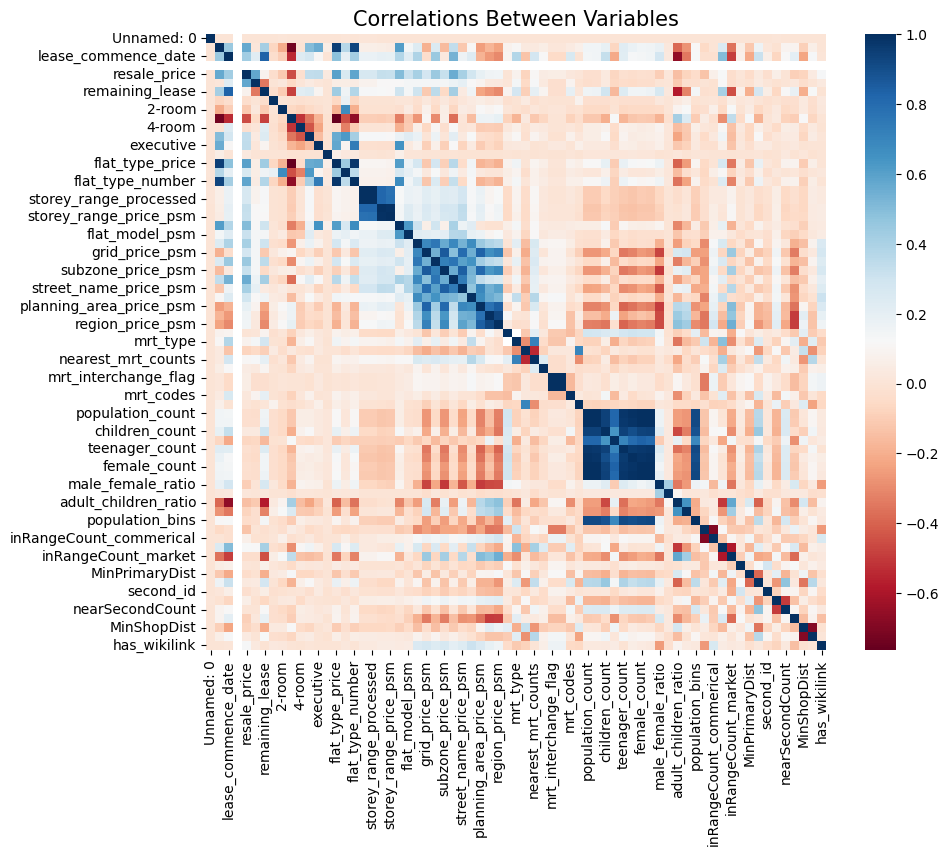

In [46]:
visualize(dataset= train_gdf)

In [66]:
import pickle
train_dataset = filterDataset(train_gdf.copy(), train=False)
# test_dataset = filterDataset(test_gdf, train=False)

with open(os.path.join(MODELPREPROCESSING_DIRECTORY, f'categorical_columns.pkl'), 'rb') as f:
    categorical_cols = pickle.load(f)
categorical_freq_cols = [i+"_freq_encode" for i in categorical_cols]
categorical_label_cols = [i+"_label_encode" for i in categorical_cols]
categorical_target_cols = [i+"_target_encode" for i in categorical_cols]

display(calculateTopChiSqure(train_dataset.loc[:, train_dataset.columns.isin(categorical_label_cols+['resale_price'])]))
display(calculateTopChiSqure(train_dataset.loc[:, train_dataset.columns.isin(categorical_freq_cols+['resale_price'])]))
display(calculateTopChiSqure(train_dataset.loc[:, train_dataset.columns.isin(categorical_target_cols+['resale_price'])]))

,columns,Chi2_Statistic,Pvalue
0,resale_price,957039.813786,0.0
1,storey_range_label_encode,927810.085489,0.0
2,storey_range_start_label_encode,832826.838588,0.0


,columns,Chi2_Statistic,Pvalue
1,town_freq_encode,474492.709124,0.000000e+00
3,region_freq_encode,474492.709124,0.000000e+00
4,flat_type_psm_freq_encode,474492.709124,0.000000e+00
0,resale_price,299323.163358,0.000000e+00
5,flat_type_number_freq_encode,152154.938659,0.000000e+00
6,opening_year_freq_encode,131225.985789,0.000000e+00
2,flat_type_freq_encode,67512.753719,0.000000e+00
10,population_bins_freq_encode,51012.918135,0.000000e+00
9,male_female_ratio_bins_freq_encode,22051.411424,0.000000e+00
7,mrt_codes_freq_encode,14419.898189,1.604455e-22


,columns,Chi2_Statistic,Pvalue
1,town_target_encode,474492.709124,0.000000e+00
3,region_target_encode,474492.709124,0.000000e+00
4,flat_type_psm_target_encode,474492.709124,0.000000e+00
0,resale_price,299323.163358,0.000000e+00
5,flat_type_number_target_encode,152154.938659,0.000000e+00
6,opening_year_target_encode,131225.985789,0.000000e+00
2,flat_type_target_encode,67512.753719,0.000000e+00
10,population_bins_target_encode,51012.918135,0.000000e+00
9,male_female_ratio_bins_target_encode,22051.411424,0.000000e+00
7,mrt_codes_target_encode,14419.898189,1.604455e-22


In [71]:
train_dataset.loc[:, ~train_dataset.columns.isin(categorical_cols)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431417 entries, 0 to 431416
Data columns (total 92 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            431417 non-null  int64  
 1   block                                 431417 non-null  object 
 2   street_name                           431417 non-null  object 
 3   floor_area_sqm                        431417 non-null  float64
 4   flat_model                            431417 non-null  object 
 5   eco_category                          431417 non-null  object 
 6   lease_commence_date                   431417 non-null  int64  
 7   elevation                             431417 non-null  float64
 8   subzone                               431417 non-null  object 
 9   planning_area                         431417 non-null  object 
 10  resale_price                          431417 non-null  float64
 11  

In [72]:
score = calculateTopCorrelation(train_dataset.loc[:, ~train_dataset.columns.isin(categorical_cols)].select_dtypes("float"))
score.head(25)

,Columns,Pearson-score
2,resale_price,1.000000
37,flat_type_psm_target_encode,0.597334
38,flat_type_number_target_encode,0.597334
35,flat_type_target_encode,0.597334
3,flat_type_price,0.597334
0,floor_area_sqm,0.570395
12,street_name_price,0.556879
6,flat_model_price,0.504070
10,subzone_price,0.445370
8,grid_price,0.414090


In [73]:
# df = calculateAnova(train_dataset.loc[:, ~train_dataset.columns.isin(categorical_cols)])
# df

block cannot perform compute ANOVA.
street_name cannot perform compute ANOVA.
eco_category does not have enough levels to compute ANOVA.
elevation does not have enough levels to compute ANOVA.
2-room cannot perform compute ANOVA.
3-room cannot perform compute ANOVA.
4-room cannot perform compute ANOVA.
5-room cannot perform compute ANOVA.
multi-generation cannot perform compute ANOVA.


,Categorical_Column,F_statistics,Pvalue
6,resale_price,2.155665e+30,0.0
63,flat_type_target_encode,2.393256e+05,0.0
67,flat_type_psm_target_encode,2.393256e+05,0.0
69,flat_type_number_target_encode,2.393256e+05,0.0
11,flat_type_price,2.393256e+05,0.0
7,rebased_month,2.176071e+05,0.0
1,floor_area_sqm,2.080501e+05,0.0
20,street_name_price,1.939272e+05,0.0
14,flat_model_price,1.469568e+05,0.0
18,subzone_price,1.067466e+05,0.0


In [74]:
train_dataset.head()

,Unnamed: 0,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,elevation,subzone,planning_area,region,resale_price,rebased_month,remaining_lease,1-room,2-room,3-room,4-room,5-room,executive,multi-generation,flat_type_price,flat_type_psm,flat_type_number,storey_range_start,storey_range_processed,storey_range_price,storey_range_price_psm,flat_model_price,flat_model_psm,grid_price,grid_price_psm,subzone_price,subzone_price_psm,street_name_price,street_name_price_psm,planning_area_price,planning_area_price_psm,region_price,region_price_psm,codes,opening_year,mrt_type,distance_to_mrt,nearest_mrt_counts,mrt_lrt_links,mrt_interchange_flag,...,senior_citizen_count,teenager_count,young_adult_count,female_count,male_count,male_female_ratio,male_female_ratio_bins,adult_children_ratio,adult_children_ratio_bins,population_bins,type_commerical,nearest_dist_commerical,inRangeCount_commerical,nearest_dist_market,inRangeCount_market,primary_id,MinPrimaryDist,nearPrimaryCount,second_id,MinSecDist,nearSecondCount,mall_id,MinShopDist,nearShopCount,has_wikilink,storey_range_label_encode,storey_range_start_label_encode,storey_range_processed_label_encode,town_target_encode,town_freq_encode,flat_type_target_encode,flat_type_freq_encode,region_target_encode,region_freq_encode,flat_type_psm_target_encode,flat_type_psm_freq_encode,flat_type_number_target_encode,flat_type_number_freq_encode,opening_year_target_encode,opening_year_freq_encode,mrt_codes_target_encode,mrt_codes_freq_encode,distance_to_mrt_bins_target_encode,distance_to_mrt_bins_freq_encode,male_female_ratio_bins_target_encode,male_female_ratio_bins_freq_encode,population_bins_target_encode,population_bins_freq_encode,type_commerical_target_encode,type_commerical_freq_encode
0,0,pasir ris,4-room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,0.0,pasir ris drive,pasir ris,east region,209700.0,20,87,0,0,0,1,0,0,0,297586.688369,3097.732558,4,1,1.0,277884.021822,2908.105442,296567.768441,3073.402991,341140.943921,2760.669385,341040.552513,2771.132887,335096.017105,2812.819138,356939.169153,2890.640586,310452.339983,3042.189928,EW1,1989.0,0,1.137654,0,0,0,...,2840.0,8970.0,10450.0,29980.0,29530.0,0.984990,2,3.094151,0,1,CR,2.307221,0,0.945000,1,89,0.343633,5,91,0.426133,4,68,1.028774,0,1,0,0,0,355747.218110,15617,297561.747511,169469,310466.585687,77278,297561.747511,169469,297561.747511,169469,324357.816587,50188.0,309463.539919,126308,301554.886484,392920,301849.509009,431225,289920.808083,93062,287665.578470,115353
1,1,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,0.0,punggol field,punggol,north-east region,402300.0,178,88,0,0,0,0,1,0,0,381620.322780,3198.112247,5,10,4.0,299298.260782,3096.857013,316907.730293,3178.192685,395392.186044,3955.489723,377687.332519,3554.183929,389482.209813,3771.986501,396370.197932,3966.474760,316400.744309,3279.778670,PE1,NaN,1,0.118453,9,0,0,...,1810.0,5600.0,4100.0,21990.0,21300.0,0.968622,2,2.395462,0,0,IEBP,1.455539,1,3.773977,0,48,0.160104,8,75,0.311598,5,125,0.802249,4,0,5,4,3,396357.889265,10147,381610.632186,98639,316387.973978,85753,381610.632186,98639,381610.632186,98639,NaN,NaN,384988.242350,8252,301554.886484,392920,301849.509009,431225,306002.583354,302412,304687.162477,180739
2,2,sengkang,5-room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,0.0,fernvale,sengkang,north-east region,351000.0,249,83,0,0,0,0,1,0,0,381620.322780,3198.112247,5,1,1.0,277884.021822,2908.105442,371640.199919,3506.222270,358302.121645,3912.529801,381799.501001,4063.775771,377199.712000,3655.481757,363989.419778,3544.140657,316400.744309,3279.778670,SW5,NaN,1,0.479542,2,0,0,...,1480.0,2960.0,4050.0,18030.0,17580.0,0.975042,2,2.453094,0,0,IEBP,1.445009,1,1.797718,0,56,0.183945,2,94,0.558057,1,127,0.450920,2,1,0,0,0,363991.854032,19382,381610.632186,98639,316387.973978,85753,381610.632186,98639,381610.632186,98639,NaN,NaN,369658.087666,9579,301554.88648

In [76]:
# importantCols = findImportantColumns(train_dataset, 0.3)
# importantCols

In [78]:
# newDataset = train_dataset[importantCols]
# newDataset = newDataset.reset_index(drop=True)
# newDataset.to_csv("../data/backup/merge_auxiliary_data_new.csv")

# Clustering

In [ ]:
# TODO: Include more columns for clustering
selected_columns = ['floor_area_sqm', 'distance_to_mrt', 'population_count', 'adult_count', 'children_count', \
                    'senior_citizen_count', 'teenager_count', 'female_count', 'male_count']

In [ ]:
# cluster_data = compute_clustering(dataset, selected_columns)

43141


: 

: 